In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import pandas as pd
import numpy as np
from math import ceil

In [21]:
import io
import requests

Content = requests.get("https://raw.githubusercontent.com/flmath-dirty/matrixes_in_erlang/master/results.cvs").content

LoadedTable= pd.read_csv(io.StringIO(Content.decode('utf-8')),skipinitialspace=True,
                  names=['Test type', 'Width', 'Height','Matrix representation','No. of calls', 'Execution time'])

In [22]:
from scipy import stats
from functools import reduce
AggregatedTable = (LoadedTable.groupby(['Test type','Matrix representation'])['Execution time']
                   .apply(list).reset_index(name='Execution Times List'))

In [23]:
AggregatedTable['Harmonic Average'] = AggregatedTable['Execution Times List'].apply(
    lambda x: stats.hmean(x) if (len(x) == 3) else np.inf)


In [24]:
AggregatedTable['Max'] = AggregatedTable['Execution Times List'].apply(
    lambda x: max(x) if (len(x) == 3) else np.inf)

In [25]:
AggregatedTable['Min'] = AggregatedTable['Execution Times List'].apply(min)

In [26]:
AggregatedTable.head()

,Test type,Matrix representation,Execution Times List,Harmonic Average,Max,Min
0,get_value,matrix_as_array,"[59.462, 232.601, 28018.33]",141.828134,2.801833e+04,59.462
1,get_value,matrix_as_big_tuple,"[25.176, 121.824, 12527.693]",62.488602,1.252769e+04,25.176
2,get_value,matrix_as_digraph,"[42.854, 211.419, 19704.339]",106.701803,1.970434e+04,42.854
3,get_value,matrix_as_list_of_lists,"[280.91, 2073.251]",inf,inf,280.910
4,get_value,matrix_as_map,"[36.883, 159.307, 15976.373]",89.679282,1.597637e+04,36.883


In [41]:
GetValue = (
    AggregatedTable
    .loc[AggregatedTable['Test type']=='get_value']
    .loc[:,['Matrix representation','Harmonic Average','Max','Min']]
    )
#GetValue.columns = GetValue.iloc[0]
GetValue = GetValue.set_index('Matrix representation')
#%matplotlib inline

In [46]:
%run https://raw.githubusercontent.com/flmath-dirty/jupyter_extensions/master/matplotlib/sawed_bar_plot.py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil

def sawed_bar_plot(DataFrame,BreakValue=350):
    # replace infinity values with reasonable values that can be ploted
    MaxNotInfValue = DataFrame['Max'].loc[DataFrame['Max']!=np.inf].max()
    Upper_yLim = np.ceil(MaxNotInfValue*1.5)
    DataFrame = DataFrame.replace(np.inf,Upper_yLim)
    #create a 3 part plot 
    f, ax = plt.subplots(3, 1, sharex=True, gridspec_kw = {'height_ratios':[11, 3,11]})
    f.set_figwidth(12.0)
    f.set_figheight(9.0)
    f.set_facecolor("lightcyan")
   
    
    #glue the 3 parts of plot    
    for axi in ax: axi.set_facecolor("lightcyan")
        
    ax[2].set_ylim(0,BreakValue)
    ax[1].set_ylim(0,1)
    ax[0].set_ylim(BreakValue,Upper_yLim)
        
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[2].spines['top'].set_visible(False)
        
    ax[0].tick_params(
            axis='x',  
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off') 
       
    ax[1].axis('off')
    ax[2].tick_params(
            axis='x',          
            which='both',
            bottom='off',
            top='off',
            labelbottom='on')
    plt.subplots_adjust(hspace=0)
    
    #draw the upper subplot
    DataFrame.plot.bar(ax=ax[0], legend=False, edgecolor = "none")

    #calculate the saw coordinates for the middle subplot
    no_of_ticks = len(ax[0].get_xticks())
    x_range = [x for x in range(-1,no_of_ticks+1)]
    upper = [1]+[0.9,0.6]*(ceil(no_of_ticks/2)-1)+[0.9,0.9,1]
    bottom =[-0.2]+[0.4,0.1]*(ceil(no_of_ticks/2)-1)+[0.5,0.5,-0.1]
    #draw the middle subplot
    ax[1].plot(x_range,upper,  color='lightgrey',linestyle=(0, (5, 5)))
    ax[1].plot(x_range,bottom, color='lightgrey',linestyle=(0, (5, 5)))
    ax[1].fill_between(x_range, bottom, upper,facecolor='teal', color='white')
    ax[1].set_facecolor("lightcyan")
    ax[1].axes.get_yaxis().set_visible(False)
        
    #draw the bottom subplot        
    DataFrame.plot.bar(ax=ax[2], legend=False, edgecolor = "none")
    ax[2].set_xticklabels(DataFrame.index.values.tolist(),rotation="horizontal")
    #f.autofmt_xdate()
    ax[2].legend(loc=9, bbox_to_anchor=(0.1, -0.1), ncol=2)
    
    plt.show()


ERROR:root:File `'https://raw.githubusercontent.com/flmath-dirty/jupyter_extensions/master/matplotlib/sawed_bar_plot.py'` not found.


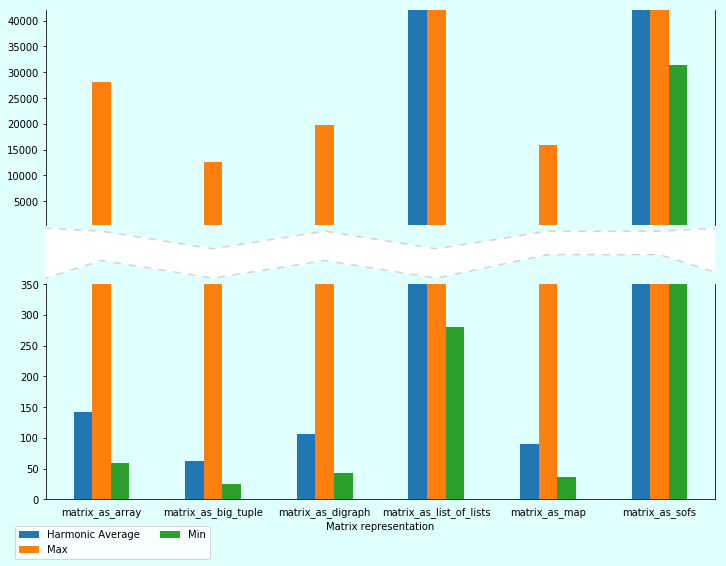

In [47]:
sawed_bar_plot(GetValue)

In [43]:
from notebook.nbextensions import check_nbextension

In [44]:
check_nbextension('codefolding', user=True)

False

In [37]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [ ]:

%load https://raw.githubusercontent.com/flmath-dirty/jupyter_extensions/master/matplotlib/sawed_bar_plot.py


In [48]:
%pwd

'C:\\Users\\math\\Documents'

In [ ]:
from notebook.nbextensions import check_nbextension
check_nbextension('codefolding', user=True)